# Mathematics of Machine Learning
## Question Sheet 5 - Problem 4

Iterative algorithms will never find the exact solution, so it is important to have suitable criteria for stopping an algorithm. Given a tolerance $\epsilon>0$, consider the following candidates for stopping criteria:



1.   $\lVert x_{k+1}-x_k\rVert<\epsilon$
2.   $\rVert\nabla f(x_k)\rVert<\epsilon$
3.   $k=100$




Apply gradient descent for minimizing the function
$$f(x)=(x+1)^6$$

(in Python, MATLAB, or by hand) with each of the given stopping criteria. Which of these is the most efficient? In general, describe the benefits or disad- vantages of each of these stopping criteria.

# Solution

To find the minima of $f$, gradient descent says that if we initalise with some $x_0\in\textbf{R}$, for $k=0,1,2,3,...$, define

$$x_{k+1}=x_k-\tau\nabla f(x_k)$$

For some fixed learning rate $\tau$.

We implement with the different stopping critera below

In [128]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.00005
def gradient_descent(x_k,alpha):
  return x_k-alpha*6*(x_k+1)**5

def f(x):
  return (x+1)**6

def criteria_1(x0, epsilon, alpha):
  x = np.array([x0])
  while np.abs(gradient_descent(x[-1],alpha)-x[-1]) > epsilon:
    x = np.append(x, gradient_descent(x[-1],alpha))
  print(f'Criteria 1 Algorithmn terminated at x = {np.round(x[-1],4)} with k = {len(x)}')
  return x

def criteria_2(x0, epsilon, alpha):
  x = np.array([x0])
  while np.abs(6*(x[-1]+1)**5) > epsilon:
    x = np.append(x, gradient_descent(x[-1], alpha))
  print(f'Criteria 2 Algorithmn terminated at x = {np.round(x[-1],4)} with k = {len(x)}')
  return x

def criteria_3(x0, epsilon, alpha):
  x = np.array([x0])
  while len(x)<100:
    x = np.append(x, gradient_descent(x[-1], alpha))
  print(f'Criteria 3 Algorithmn terminated at x = {np.round(x[-1],4)} with k = {len(x)}')
  return x

def experiment(x0,epsilon,alpha):

  print(f'\nWe apply gradient descent with x0 = {x0}, epsilon = {epsilon}, alpha = {alpha}\n')

  fig, (ax1, ax2, ax3) = plt.subplots(1, 3 ,figsize=(14,7))
  X = np.linspace(-4,2,1000)

  # Condition 1
  ax1.plot(X,f(X), color = 'red', label='$f(x) = (x+1)^6$')
  x = criteria_1(x0,epsilon,alpha)
  ax1.scatter(x,f(x), color = 'green',label = '$|| x_{k+1}-x_k||<\epsilon$')

  # Condition 2
  ax2.plot(X,f(X), color = 'red', label='$f(x) = (x+1)^6$')
  x = criteria_2(x0,epsilon,alpha)
  ax2.scatter(x,f(x), color = 'green',label = '$||df(x_k)||<\epsilon$')

  # Condition 3
  ax3.plot(X,f(X), color = 'red', label='$f(x) = (x+1)^6$')
  x = criteria_3(x0,epsilon,alpha)
  ax3.scatter(x,f(x), color = 'green',label = '$k<100$')

  plt.show()

# Experiments
We can now run gradient descent on $f$ with different learning rates and values of $\epsilon$


We apply gradient descent with x0 = 2, epsilon = 0.1, alpha = 0.0001

Criteria 1 Algorithmn terminated at x = 1.7405 with k = 3
Criteria 2 Algorithmn terminated at x = -0.5591 with k = 11015
Criteria 3 Algorithmn terminated at x = 0.4078 with k = 100


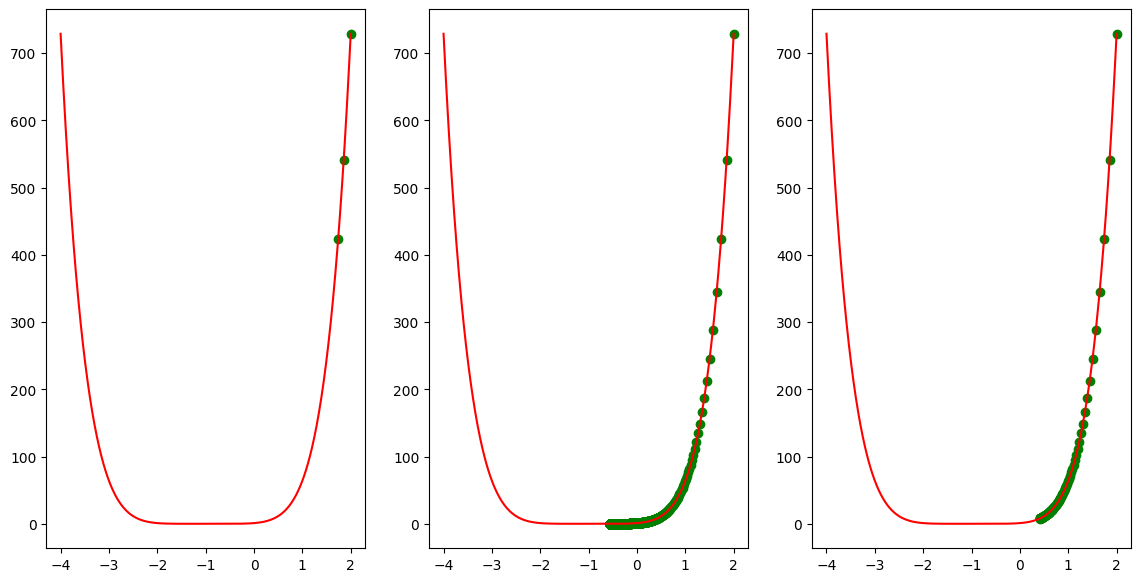

In [130]:
experiment(2,0.1,0.0001)


We apply gradient descent with x0 = 2, epsilon = 0.05, alpha = 0.0001

Criteria 1 Algorithmn terminated at x = 1.3913 with k = 8
Criteria 2 Algorithmn terminated at x = -0.6162 with k = 19184
Criteria 3 Algorithmn terminated at x = 0.4078 with k = 100


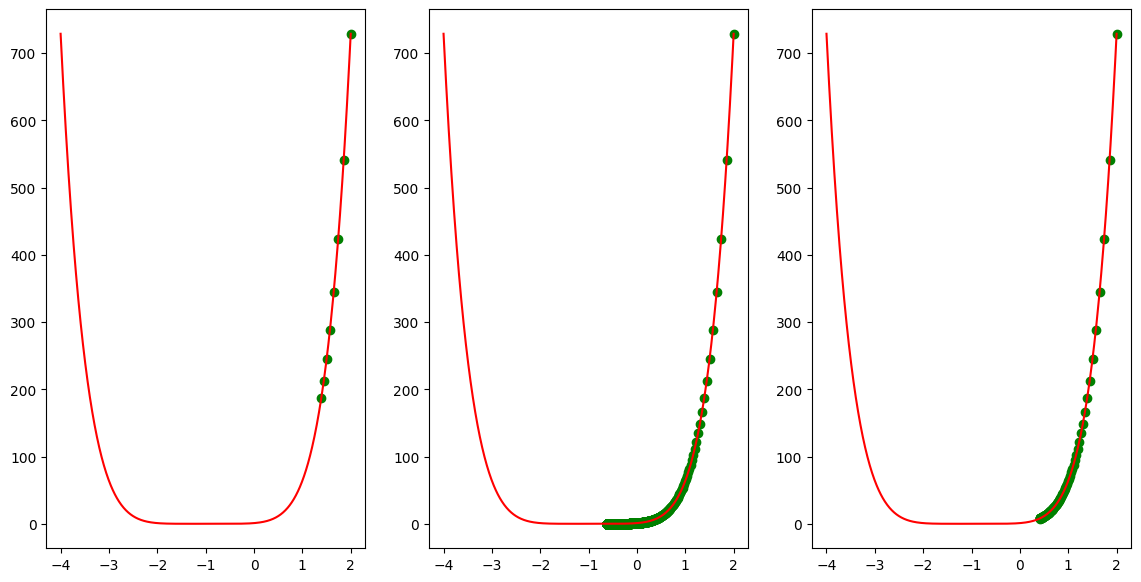

In [133]:
experiment(2,0.05,0.0001)


We apply gradient descent with x0 = 2, epsilon = 0.001, alpha = 0.001

Criteria 1 Algorithmn terminated at x = -0.3018 with k = 168
Criteria 2 Algorithmn terminated at x = -0.8245 with k = 43874
Criteria 3 Algorithmn terminated at x = -0.2102 with k = 100


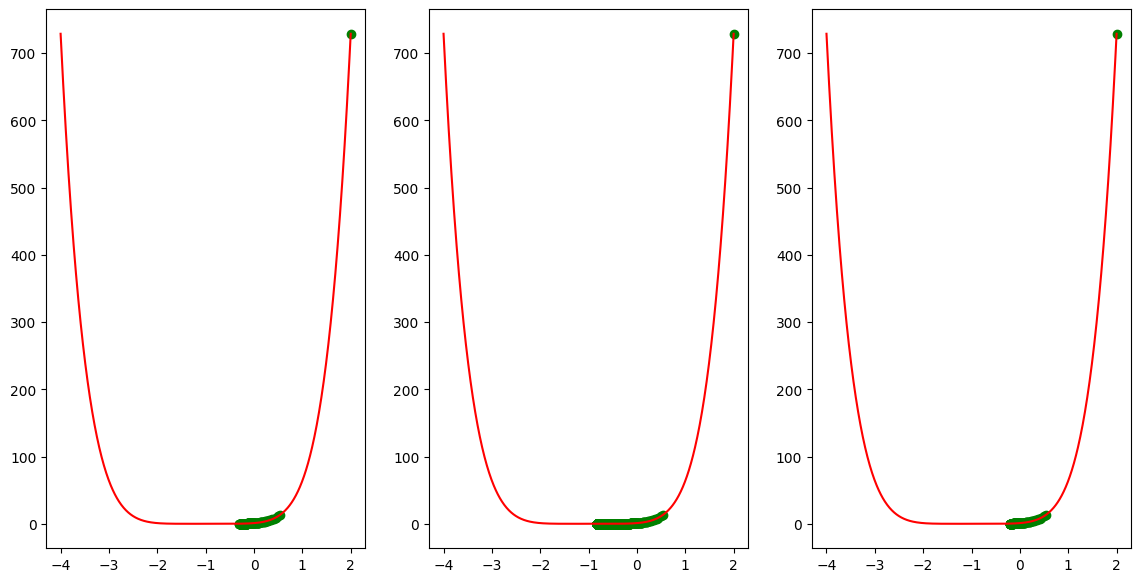

In [134]:
experiment(2,0.001,0.001)

# Discussion

With an appropriately chosen learning rate, the first condition that $\lVert x_{k+1}-x_{k} \rVert<\epsilon$ is the most efficent. It can reach closest to the minimum with far fewer iterations than condition two, with only a little higher cost than condition 3.

### Benefits and Disadvantages


*   Condition 1 has a lower accuracy but lower computational cost. With an approprately chosen learning rate, this should be the most efficient
*   Condition 2 is the most accurate but also the most computationally expensive. If the gradient near the minimum is very shallow, then many computations are required for only a small gain in accuracy. A variable learning rate could make this condition more efficent. This condition is closest to our theoretical optimum condition that (as $f$ is convex) $w_* \in \text{argmin}(f)$ if and only if $\nabla f(w_*) = 0$
*   Condition 3 is a benchmark condition to compare 1 and 2. It is computationally inexpensive but inaccurate.





